<a href="https://colab.research.google.com/github/Bassana07/devoir-theorie-graphe-s5/blob/main/Devoir%20theorie%20des%20graphes%20groupe%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJET SCOLAIRE - THEORIE DES GRAPHES
============================================================

I. Configuration de l'environement

In [1]:
# Importations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import FancyBboxPatch, Circle
import warnings

# Parametrage pour l'affichage
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

II. Fonctions usuelle

II. Modelisation mathematique

In [ ]:
# Informations sur les lycées
lycees_info = {
    'L0': {'nom': 'Serveur central', 'distance_centre': 0, 'eleves': 0},
    'L1': {'nom': 'Lycée Bogodogo', 'distance_centre': 3, 'eleves': 2500},
    'L2': {'nom': 'Lycée Zinda', 'distance_centre': 4, 'eleves': 3000},
    'L3': {'nom': 'Lycée Mandela', 'distance_centre': 6, 'eleves': 2000},
    'L4': {'nom': 'Lycée Municipal', 'distance_centre': 2, 'eleves': 1800},
    'L5': {'nom': 'Lycée Scientifique', 'distance_centre': 8, 'eleves': 1200},
    'L6': {'nom': 'Lycée Mixte', 'distance_centre': 5, 'eleves': 2200}
}

# Matrice de distances complète (7x7)
labels = ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6']
distance_matrix = np.array([
    [0, 3, 4, 6, 2, 8, 5],  # L0
    [3, 0, 3, 5, 4, 2, 7],  # L1
    [4, 3, 0, 2, 3, 4, 6],  # L2
    [6, 5, 2, 0, 3, 5, 4],  # L3
    [2, 4, 3, 3, 0, 3, 5],  # L4
    [8, 2, 4, 5, 3, 0, 6],  # L5
    [5, 7, 6, 4, 5, 6, 0]   # L6
])

# Affichage de la matrice de distances
print("\n Matrice de Distances (km): \n")
df_distances = pd.DataFrame(distance_matrix, index=labels, columns=labels)
print(df_distances)

# Coûts
COUT_FIBRE_PAR_KM = 500000  # FCFA
COUT_RADIO_PAIRE = 2000000  # FCFA
SEUIL_RADIO = 5  # km

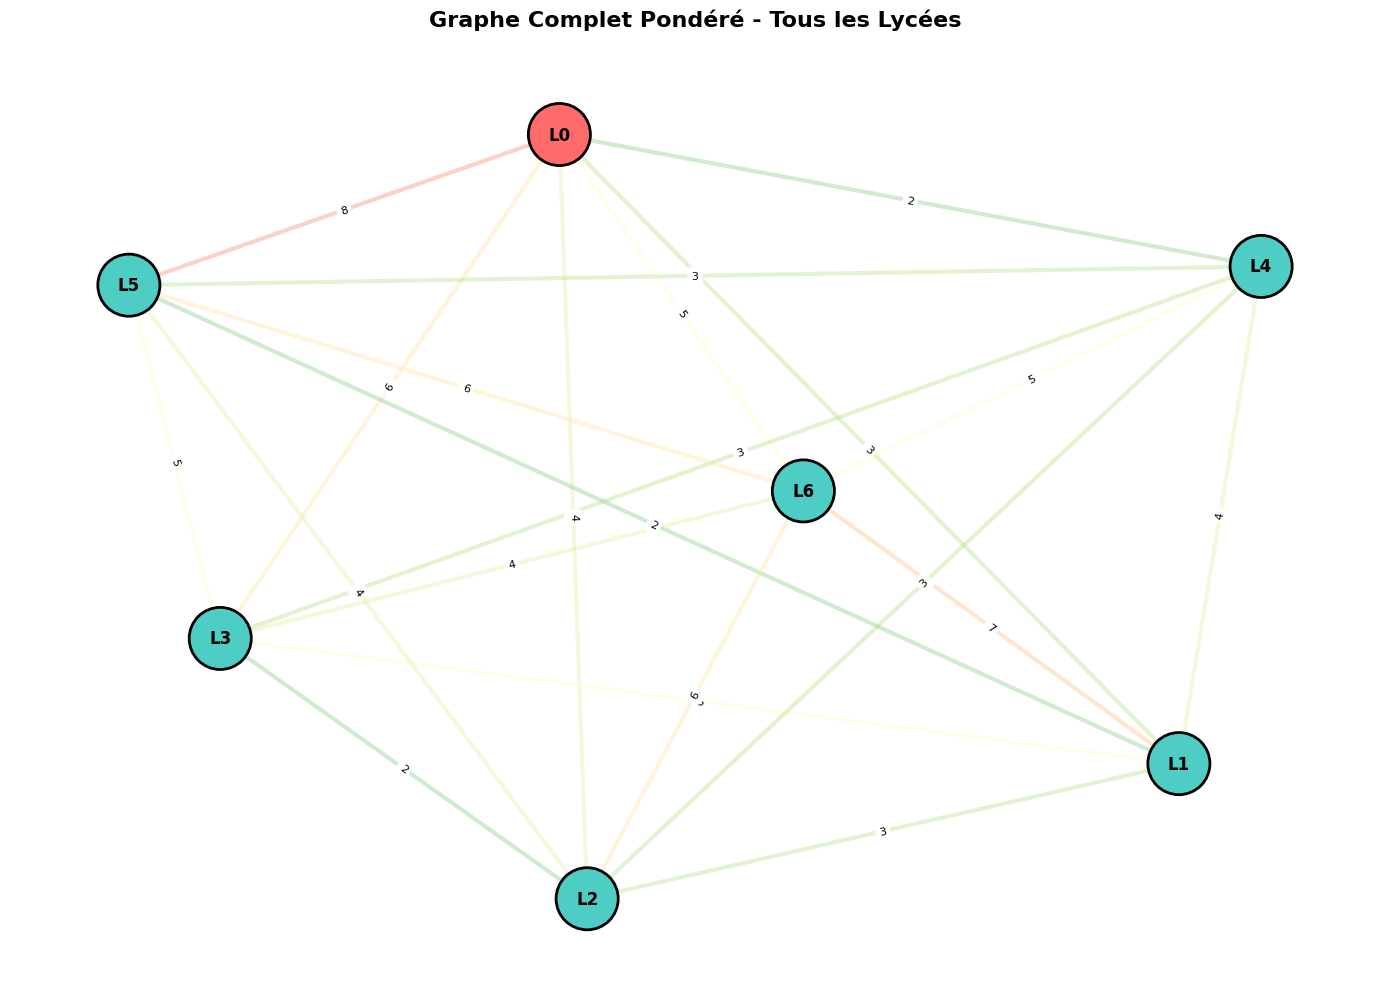

In [ ]:
# Créer le graphe complet
G_complet = nx.Graph()
for i, node in enumerate(labels):
    G_complet.add_node(node, nom=lycees_info[node]['nom'])

# Ajouter toutes les arêtes avec leurs distances
aretes_completes = []
for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        distance = distance_matrix[i][j]
        G_complet.add_edge(labels[i], labels[j], weight=distance)
        aretes_completes.append((labels[i], labels[j], distance))

# Visualisation du graphe complet
fig, ax = plt.subplots(figsize=(14, 10))
pos = nx.spring_layout(G_complet, seed=42, k=2)

# Dessiner les arêtes avec couleurs selon distance
edges = G_complet.edges()
weights = [G_complet[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G_complet, pos, width=3, alpha=0.3, edge_color=weights,
edge_cmap=plt.cm.RdYlGn_r, edge_vmin=0, edge_vmax=10)

# Dessiner les nœuds
nx.draw_networkx_nodes(G_complet, pos, node_size=2000,
node_color=['#FF6B6B' if n=='L0' else '#4ECDC4' for n in G_complet.nodes()],
edgecolors='black', linewidths=2)
# Labels des nœuds
nx.draw_networkx_labels(G_complet, pos, font_size=12, font_weight='bold')

# Labels des arêtes (distances)
edge_labels = nx.get_edge_attributes(G_complet, 'weight')
nx.draw_networkx_edge_labels(G_complet, pos, edge_labels, font_size=8)

plt.title("Graphe Complet Pondéré - Tous les Lycées", fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

III. Algorithme de Kruskal

In [ ]:
def kruskal(Graphe):
    # Récupération des arêtes
    aretes = [(u, v, data['weight']) for u, v, data in Graphe.edges(data=True)]

    # Initialisation Union-Find
    parent = {n: n for n in Graphe.nodes()}
    mst = []

    def trouver(x):
        if parent[x] != x:
            parent[x] = trouver(parent[x])
        return parent[x]

    def union(x, y):
        parent[trouver(x)] = trouver(y)

    # Tri des arêtes par poids
    aretes.sort(key=lambda x: x[2])

    # Kruskal
    for u, v, poids in aretes:
        if trouver(u) != trouver(v):
            mst.append((u, v, poids))
            union(u, v)

    return mst


 Arêtes de l'Arbre Couvrant de Minimal :
   1. L0-L4: 2 km
   2. L1-L5: 2 km
   3. L2-L3: 2 km
   4. L0-L1: 3 km
   5. L1-L2: 3 km
   6. L3-L6: 4 km

 Distance totale: 16 km
 Coût en fibre optique: 8,000,000 FCFA


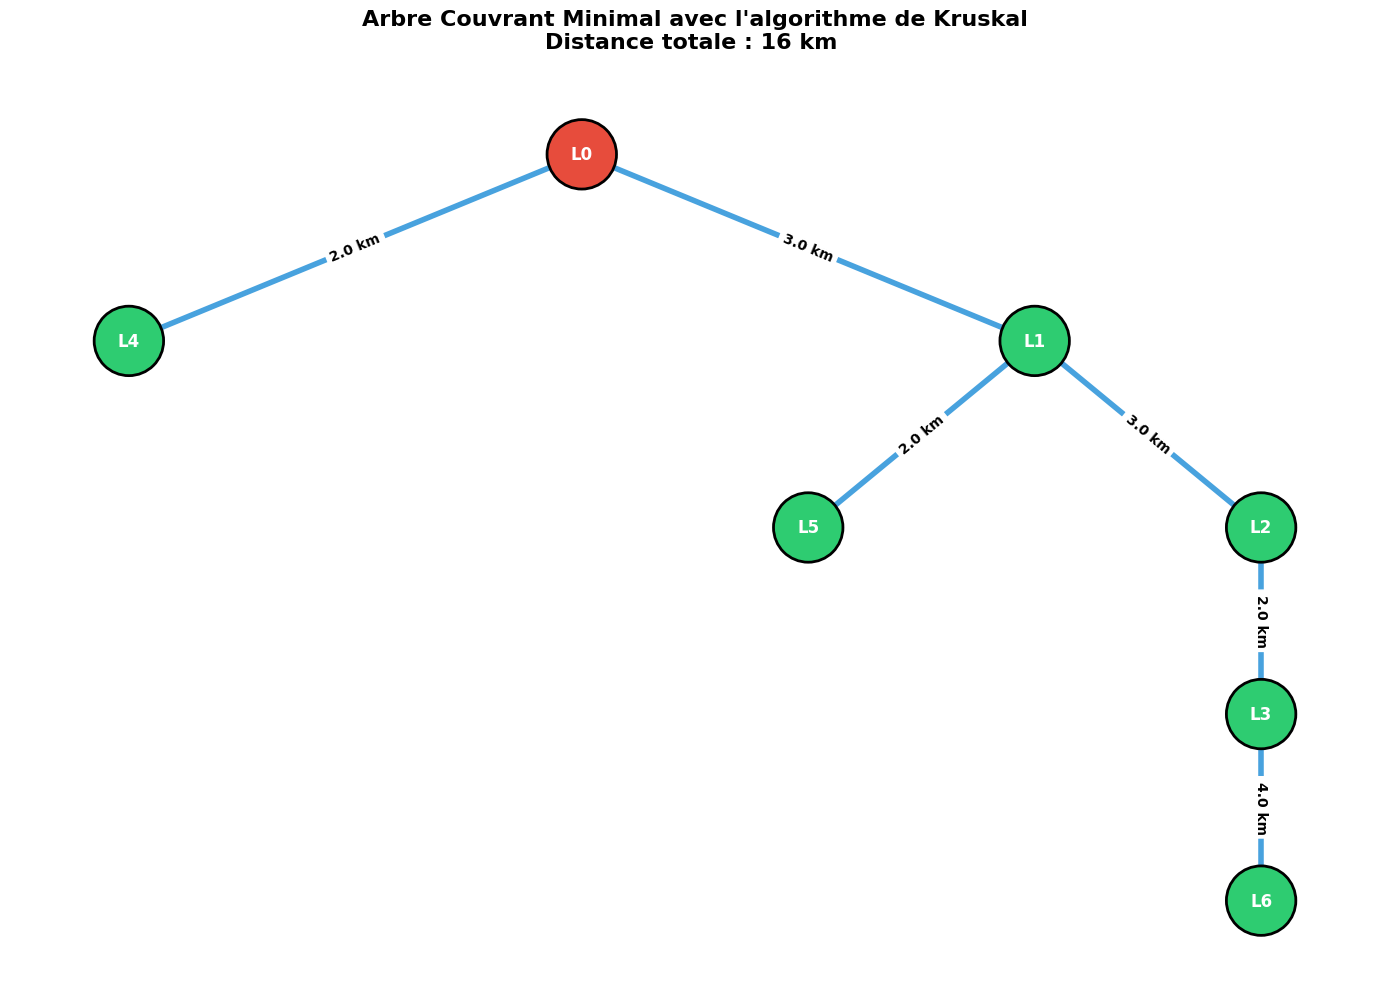

In [ ]:
# ================================
# Données ACM depuis Kruskal
# ================================
acm_edges = kruskal(G_complet)

# Calculs
distance_totale_acm = sum(d for _, _, d in acm_edges)

print(f"\n Arêtes de l'Arbre Couvrant de Minimal :")
for i, (u, v, d) in enumerate(acm_edges, 1):
    print(f"   {i}. {u}-{v}: {d} km")

print(f"\n Distance totale: {distance_totale_acm} km")

distance_totale_acm = sum([d for _, _, d in acm_edges])
cout_fibre_acm = distance_totale_acm * COUT_FIBRE_PAR_KM
print(f" Coût en fibre optique: {cout_fibre_acm:,} FCFA")

# ================================
# Disposition des aretes et sommet pour le graphe ACM
# ================================
def hierarchy_pos(G, root=None, width=1.0, vert_gap=0.15, vert_loc=0, xcenter=0.5):
    """
    Positionne un arbre sans croisement (layout hiérarchique).
    """
    if root is None:
        root = list(G.nodes())[0]

    def _hierarchy_pos(G, root, left, right, vert_loc, pos, parent=None):
        pos[root] = ((left + right) / 2, vert_loc)

        children = list(G.neighbors(root))
        if parent is not None:
            children.remove(parent)

        if len(children) != 0:
            dx = (right - left) / len(children)
            nextx = left
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(
                    G, child,
                    nextx - dx, nextx,
                    vert_loc - vert_gap,
                    pos, root
                )
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_loc, {})

# ================================
# Création du graphe ACM
# ================================
G_acm = nx.Graph()

# Ajouter les nœuds
for node in G_complet.nodes():
    G_acm.add_node(node)

# Ajouter les arêtes de l’ACM
for u, v, d in acm_edges:
    G_acm.add_edge(u, v, weight=d)


# ================================
# Visualisation de l'ACM
# ================================
fig, ax = plt.subplots(figsize=(14, 10))

# Astuce : garder la même disposition que le graphe complet
pos_acm = hierarchy_pos(G_acm, root='L0')

# Dessiner les arêtes
nx.draw_networkx_edges(
    G_acm, pos_acm,
    width=4,
    alpha=0.9,
    edge_color='#3498db'
)

# Dessiner les nœuds
nx.draw_networkx_nodes(
    G_acm, pos_acm,
    node_size=2500,
    node_color=['#e74c3c' if n == 'L0' else '#2ecc71' for n in G_acm.nodes()],
    edgecolors='black',
    linewidths=2
)

# Labels des nœuds
nx.draw_networkx_labels(
    G_acm, pos_acm,
    font_size=12,
    font_weight='bold',
    font_color='white'
)

# Labels des arêtes
edge_labels_acm = {
    (u, v): f"{d:.1f} km" for u, v, d in acm_edges
}
nx.draw_networkx_edge_labels(
    G_acm, pos_acm,
    edge_labels_acm,
    font_size=10,
    font_weight='bold'
)

# Titre
plt.title(
    f"Arbre Couvrant Minimal avec l'algorithme de Kruskal\n"
    f"Distance totale : {distance_totale_acm} km ",
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.axis('off')
plt.tight_layout()
plt.show()

IV. Optimisation

In [ ]:
# Identifier les lycées éligibles pour la radio (< 5 km du serveur)
print("\n Analyse de la contrainte radio:")
print(f"Contrainte: Lycées à moins de {SEUIL_RADIO} km du serveur L0\n")

lycees_eligibles = []
for i, lycee in enumerate(labels[1:], 1):  # Exclure L0
    dist = distance_matrix[0][i]
    eligible = dist < SEUIL_RADIO
    status = "✅" if eligible else "❌"
    print(f"{status} L0 ↔ {lycee}: {dist} km {'(éligible)' if eligible else '(trop loin)'}")
    if eligible:
        lycees_eligibles.append(lycee)

print(f"\n Lycées éligibles pour radio: {lycees_eligibles}")

# Vérifier les distances inter-lycées dans le cluster
cluster_radio = ['L0'] + lycees_eligibles
print(f"\n Vérification du cluster radio {cluster_radio}:")
print("Toutes les distances doivent être < 5 km:")

valid_cluster = True
for i, l1 in enumerate(cluster_radio):
    for l2 in cluster_radio[i+1:]:
        idx1, idx2 = labels.index(l1), labels.index(l2)
        dist = distance_matrix[idx1][idx2]
        status = "✅" if dist < SEUIL_RADIO else "❌"
        print(f"{status} {l1} ↔ {l2}: {dist} km")
        if dist >= SEUIL_RADIO:
            valid_cluster = False

if valid_cluster:
    print(f"\n✅ Cluster radio VALIDE! Les lycées {lycees_eligibles} peuvent acceder à la liaison radio.")
else:
    print("\n❌ Cluster radio INVALIDE!")


 Analyse de la contrainte radio:
Contrainte: Lycées à moins de 5 km du serveur L0

✅ L0 ↔ L1: 3 km (éligible)
✅ L0 ↔ L2: 4 km (éligible)
❌ L0 ↔ L3: 6 km (trop loin)
✅ L0 ↔ L4: 2 km (éligible)
❌ L0 ↔ L5: 8 km (trop loin)
❌ L0 ↔ L6: 5 km (trop loin)

 Lycées éligibles pour radio: ['L1', 'L2', 'L4']

 Vérification du cluster radio ['L0', 'L1', 'L2', 'L4']:
Toutes les distances doivent être < 5 km:
✅ L0 ↔ L1: 3 km
✅ L0 ↔ L2: 4 km
✅ L0 ↔ L4: 2 km
✅ L1 ↔ L2: 3 km
✅ L1 ↔ L4: 4 km
✅ L2 ↔ L4: 3 km

✅ Cluster radio VALIDE! Les lycées ['L1', 'L2', 'L4'] peuvent acceder à la liaison radio.


In [ ]:
# Construire la solution hybride
# On garde les arêtes de l'ACM qui ne sont PAS dans le cluster radio
edges_radio_removed = []
edges_fibre_kept = []

for u, v, d in acm_edges:
    if u in cluster_radio and v in cluster_radio:
        edges_radio_removed.append((u, v, d))
    else:
        edges_fibre_kept.append((u, v, d))

print(f"\n Arêtes remplacées par radio :")

for u, v, d in edges_radio_removed:
    print(f"    {u}-{v}: {d} km")

print(f"\n Arêtes fibre conservées:")
distance_fibre_hybride = 0
for u, v, d in edges_fibre_kept:
    print(f"    {u}-{v}: {d} km")
    distance_fibre_hybride += d

# Calcul des coûts
cout_radio = COUT_RADIO_PAIRE
cout_fibre_hybride = distance_fibre_hybride * COUT_FIBRE_PAR_KM
cout_total_hybride = cout_radio + cout_fibre_hybride
economie = cout_fibre_acm - cout_total_hybride
economie_pct = (economie / cout_fibre_acm) * 100

print("\n" + "="*60)
print(" CALCUL DES COÛTS - SOLUTION HYBRIDE")
print("="*60)
print(f"\n Coût radio (1 paire): {cout_radio:,} FCFA")
print(f" Coût fibre ({distance_fibre_hybride} km): {cout_fibre_hybride:,} FCFA \n")

cout_optimised = cout_fibre_hybride + cout_radio
cout_economie = cout_fibre_acm - cout_optimised

print(f" Coût apres optimisation : {cout_optimised:,} FCFA")
print(f" Economie realiser apres optimisation : {cout_economie:,} FCFA")


 Arêtes remplacées par radio :
    L0-L4: 2 km
    L0-L1: 3 km
    L1-L2: 3 km

 Arêtes fibre conservées:
    L1-L5: 2 km
    L2-L3: 2 km
    L3-L6: 4 km

 CALCUL DES COÛTS - SOLUTION HYBRIDE

 Coût radio (1 paire): 2,000,000 FCFA
 Coût fibre (8 km): 4,000,000 FCFA 

 Coût apres optimisation : 6,000,000 FCFA
 Economie realiser apres optimisation : 2,000,000 FCFA


V. Graphe de resume

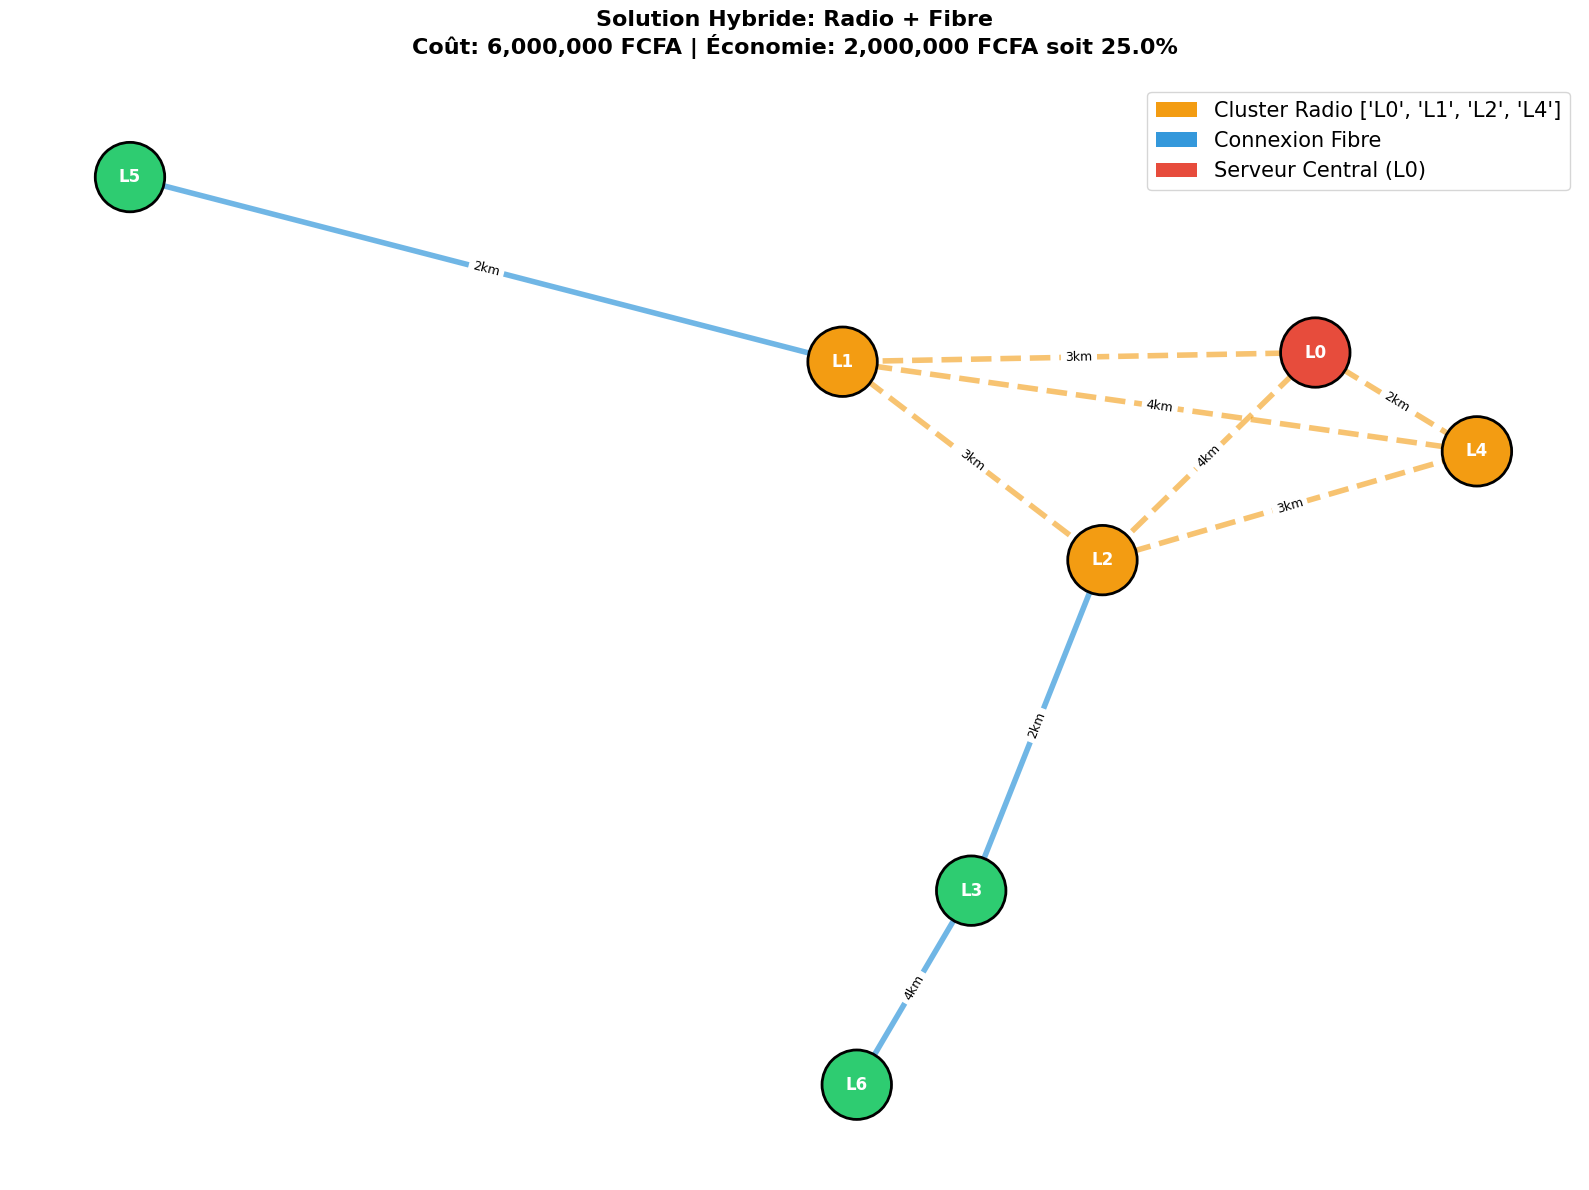

In [ ]:
# Créer le graphe hybride
G_hybride = nx.Graph()
for node in labels:
    G_hybride.add_node(node)

# Ajouter les connexions radio (toutes les paires du cluster)
for i, u in enumerate(cluster_radio):
    for v in cluster_radio[i+1:]:
        idx1, idx2 = labels.index(u), labels.index(v)
        dist = distance_matrix[idx1][idx2]
        G_hybride.add_edge(u, v, weight=dist, type='radio')

# Ajouter les connexions fibre
for u, v, d in edges_fibre_kept:
    G_hybride.add_edge(u, v, weight=d, type='fibre')

# Visualisation de la solution hybride
fig, ax = plt.subplots(figsize=(16, 12))
pos_hybride = nx.spring_layout(
    G_hybride,
    seed=42,
    k=6,
    iterations=300
)

# Dessiner les arêtes radio (en orange/jaune)
radio_edges = [(u, v) for u, v, d in G_hybride.edges(data=True) if d.get('type') == 'radio']
nx.draw_networkx_edges(G_hybride, pos_hybride, edgelist=radio_edges,
                       width=4, alpha=0.6, edge_color='#f39c12', style='dashed',
                       label='Radio')
# Dessiner les arêtes fibre (en bleu)
fibre_edges = [(u, v) for u, v, d in G_hybride.edges(data=True) if d.get('type') == 'fibre']
nx.draw_networkx_edges(G_hybride, pos_hybride, edgelist=fibre_edges,
                       width=4, alpha=0.7, edge_color='#3498db',
                       label='Fibre')

# Dessiner les nœuds
node_colors = []
for n in G_hybride.nodes():
    if n == 'L0':
        node_colors.append('#e74c3c')  # Rouge pour serveur
    elif n in cluster_radio:
        node_colors.append('#f39c12')  # Orange pour cluster radio
    else:
        node_colors.append('#2ecc71')  # Vert pour fibre uniquement

nx.draw_networkx_nodes(G_hybride, pos_hybride, node_size=2500,
                       node_color=node_colors, edgecolors='black', linewidths=2)
nx.draw_networkx_labels(G_hybride, pos_hybride, font_size=12, font_weight='bold', font_color='white')

# Labels des arêtes
edge_labels_hybride = {}
for u, v, data in G_hybride.edges(data=True):
    edge_labels_hybride[(u, v)] = f"{data['weight']}km"

nx.draw_networkx_edge_labels(G_hybride, pos_hybride, edge_labels_hybride, font_size=9)

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#f39c12', label=f'Cluster Radio {cluster_radio}'),
    Patch(facecolor='#3498db', label='Connexion Fibre'),
    Patch(facecolor='#e74c3c', label='Serveur Central (L0)')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=15)

plt.title(f"Solution Hybride: Radio + Fibre\nCoût: {cout_total_hybride:,} FCFA | Économie: {economie:,} FCFA soit {economie_pct:.1f}%",
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

VI. Validation


📊 TABLEAU COMPARATIF DES SOLUTIONS:

            Critère Solution Tout Fibre  Solution Hybride
        Technologie    Fibre uniquement   1 Radio + Fibre
Distance fibre (km)                  16                 8
   Nombre de radios                   0                 1
  Coût fibre (FCFA)           8,000,000         4,000,000
  Coût radio (FCFA)                   0         2,000,000
  COÛT TOTAL (FCFA)           8,000,000         6,000,000
    Économie (FCFA)                   - 2,000,000 (25.0%)

🔍 VALIDATION DE LA CONNECTIVITÉ:
Graphe connexe: ✅ OUI

Chemins depuis L0 vers chaque lycée:
   L0 → L1: L0 → L1 (3 km)
   L0 → L2: L0 → L2 (4 km)
   L0 → L3: L0 → L2 → L3 (6 km)
   L0 → L4: L0 → L4 (2 km)
   L0 → L5: L0 → L1 → L5 (5 km)
   L0 → L6: L0 → L2 → L3 → L6 (10 km)


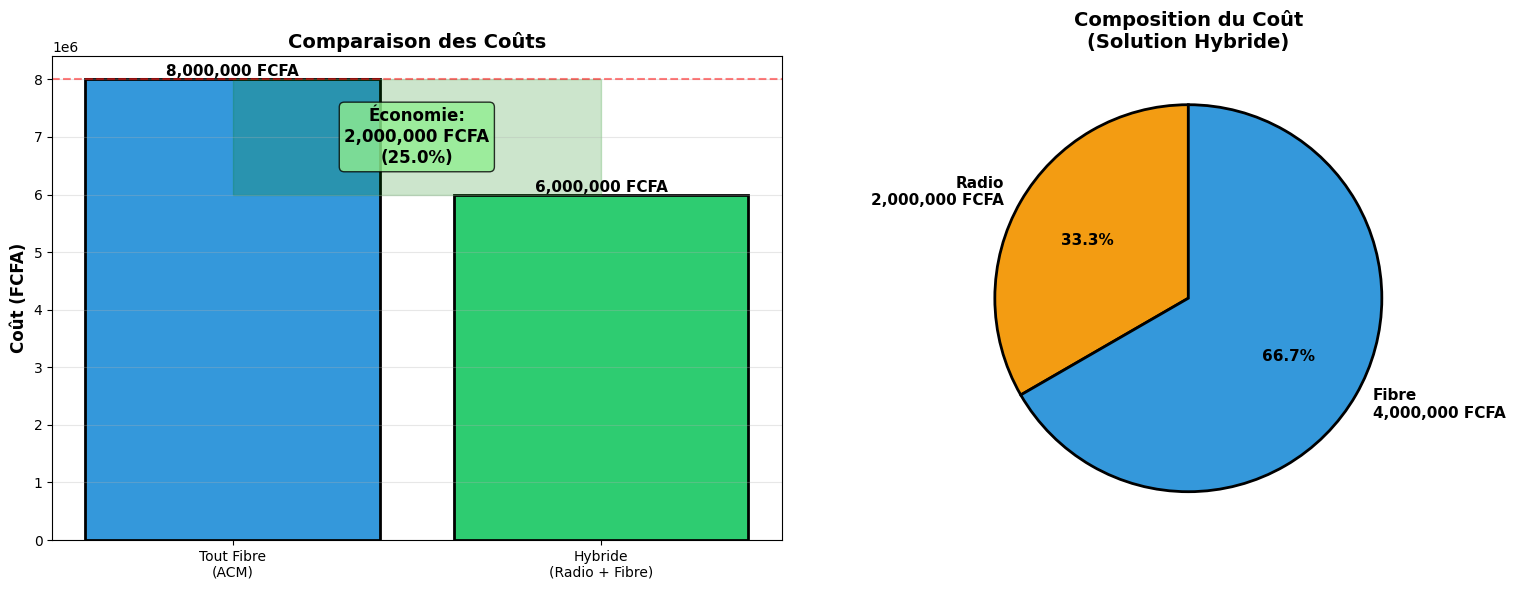

In [ ]:
# Tableau comparatif
print("\n📊 TABLEAU COMPARATIF DES SOLUTIONS:\n")
comparaison = pd.DataFrame({
    'Critère': ['Technologie', 'Distance fibre (km)', 'Nombre de radios',
                'Coût fibre (FCFA)', 'Coût radio (FCFA)', 'COÛT TOTAL (FCFA)', 'Économie (FCFA)'],
    'Solution Tout Fibre': ['Fibre uniquement', distance_totale_acm, 0,
                            f'{cout_fibre_acm:,}', 0, f'{cout_fibre_acm:,}', '-'],
    'Solution Hybride': [f'1 Radio + Fibre', distance_fibre_hybride, 1,
                        f'{cout_fibre_hybride:,}', f'{cout_radio:,}',
                        f'{cout_total_hybride:,}', f'{economie:,} ({economie_pct:.1f}%)']
})
print(comparaison.to_string(index=False))

# Vérification de la connectivité
print("\n🔍 VALIDATION DE LA CONNECTIVITÉ:")
print(f"Graphe connexe: {'✅ OUI' if nx.is_connected(G_hybride) else '❌ NON'}")

if nx.is_connected(G_hybride):
    print("\nChemins depuis L0 vers chaque lycée:")
    for target in labels[1:]:
        path = nx.shortest_path(G_hybride, 'L0', target)
        path_str = " → ".join(path)
        path_length = nx.shortest_path_length(G_hybride, 'L0', target, weight='weight')
        print(f"   L0 → {target}: {path_str} ({path_length} km)")

# Graphique de comparaison des coûts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique à barres
solutions = ['Tout Fibre\n(ACM)', 'Hybride\n(Radio + Fibre)']
couts = [cout_fibre_acm, cout_total_hybride]
colors = ['#3498db', '#2ecc71']

bars = ax1.bar(solutions, couts, color=colors, edgecolor='black', linewidth=2)
ax1.set_ylabel('Coût (FCFA)', fontsize=12, fontweight='bold')
ax1.set_title('Comparaison des Coûts', fontsize=14, fontweight='bold')
ax1.yaxis.grid(True, alpha=0.3)

for bar, cout in zip(bars, couts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{cout:,.0f} FCFA',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Économie réalisée
ax1.axhline(y=cout_fibre_acm, color='red', linestyle='--', alpha=0.5, label='Coût ACM')
ax1.fill_between([0, 1], cout_total_hybride, cout_fibre_acm, alpha=0.2, color='green')
ax1.text(0.5, (cout_fibre_acm + cout_total_hybride)/2,
         f'Économie:\n{economie:,} FCFA\n({economie_pct:.1f}%)',
         ha='center', va='center', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Diagramme circulaire de la composition des coûts (solution hybride)
cout_components = [cout_radio, cout_fibre_hybride]
labels_pie = [f'Radio\n{cout_radio:,} FCFA', f'Fibre\n{cout_fibre_hybride:,} FCFA']
colors_pie = ['#f39c12', '#3498db']

wedges, texts, autotexts = ax2.pie(cout_components, labels=labels_pie, colors=colors_pie,
                                     autopct='%1.1f%%', startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'},
                                     wedgeprops={'edgecolor': 'black', 'linewidth': 2})

ax2.set_title('Composition du Coût\n(Solution Hybride)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

VII. RÉSUMÉ FINAL ET CONCLUSION

In [ ]:
print(f"""
✅ SOLUTION OPTIMALE: Réseau Hybride (Radio + Fibre)

📊 RÉSULTATS CLÉS:
   • Tous les {len(labels)-1} lycées sont connectés au serveur central
   • Cluster radio: {cluster_radio}
   • Connexions fibre: {len(edges_fibre_kept)} arêtes ({distance_fibre_hybride} km)

💰 COÛTS:
   • Solution tout fibre (ACM): {cout_fibre_acm:,} FCFA
   • Solution hybride optimisée: {cout_total_hybride:,} FCFA
   • ÉCONOMIE RÉALISÉE: {economie:,} FCFA ({economie_pct:.1f}%)

🎓 AVANTAGES:
   ✅ Coût réduit de {economie_pct:.1f}%
   ✅ Connectivité complète garantie
   ✅ Utilisation intelligente des technologies
   ✅ Respect de toutes les contraintes (radio < {SEUIL_RADIO} km)
""")


✅ SOLUTION OPTIMALE: Réseau Hybride (Radio + Fibre)

📊 RÉSULTATS CLÉS:
   • Tous les 6 lycées sont connectés au serveur central
   • Cluster radio: ['L0', 'L1', 'L2', 'L4']
   • Connexions fibre: 3 arêtes (8 km)
   
💰 COÛTS:
   • Solution tout fibre (ACM): 8,000,000 FCFA
   • Solution hybride optimisée: 6,000,000 FCFA
   • ÉCONOMIE RÉALISÉE: 2,000,000 FCFA (25.0%)

🎓 AVANTAGES:
   ✅ Coût réduit de 25.0%
   ✅ Connectivité complète garantie
   ✅ Utilisation intelligente des technologies
   ✅ Respect de toutes les contraintes (radio < 5 km)

